In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


In [2]:
df = pd.read_csv("personality_dataset.csv")
df.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [3]:
# Encode Yes/No and Personality columns
label_enc = LabelEncoder()
df['Stage_fear'] = label_enc.fit_transform(df['Stage_fear'])
df['Drained_after_socializing'] = label_enc.fit_transform(df['Drained_after_socializing'])
df['Personality'] = label_enc.fit_transform(df['Personality'])  # 0: Extrovert, 1: Introvert

df.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,1,6,7,0,14,5,0
1,2,0,8,6,0,7,8,0
2,1,0,9,4,0,9,3,0
3,8,0,0,0,1,9,3,1
4,5,1,3,0,0,2,6,1


In [4]:
X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.994

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       504
           1       1.00      0.99      0.99       496

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



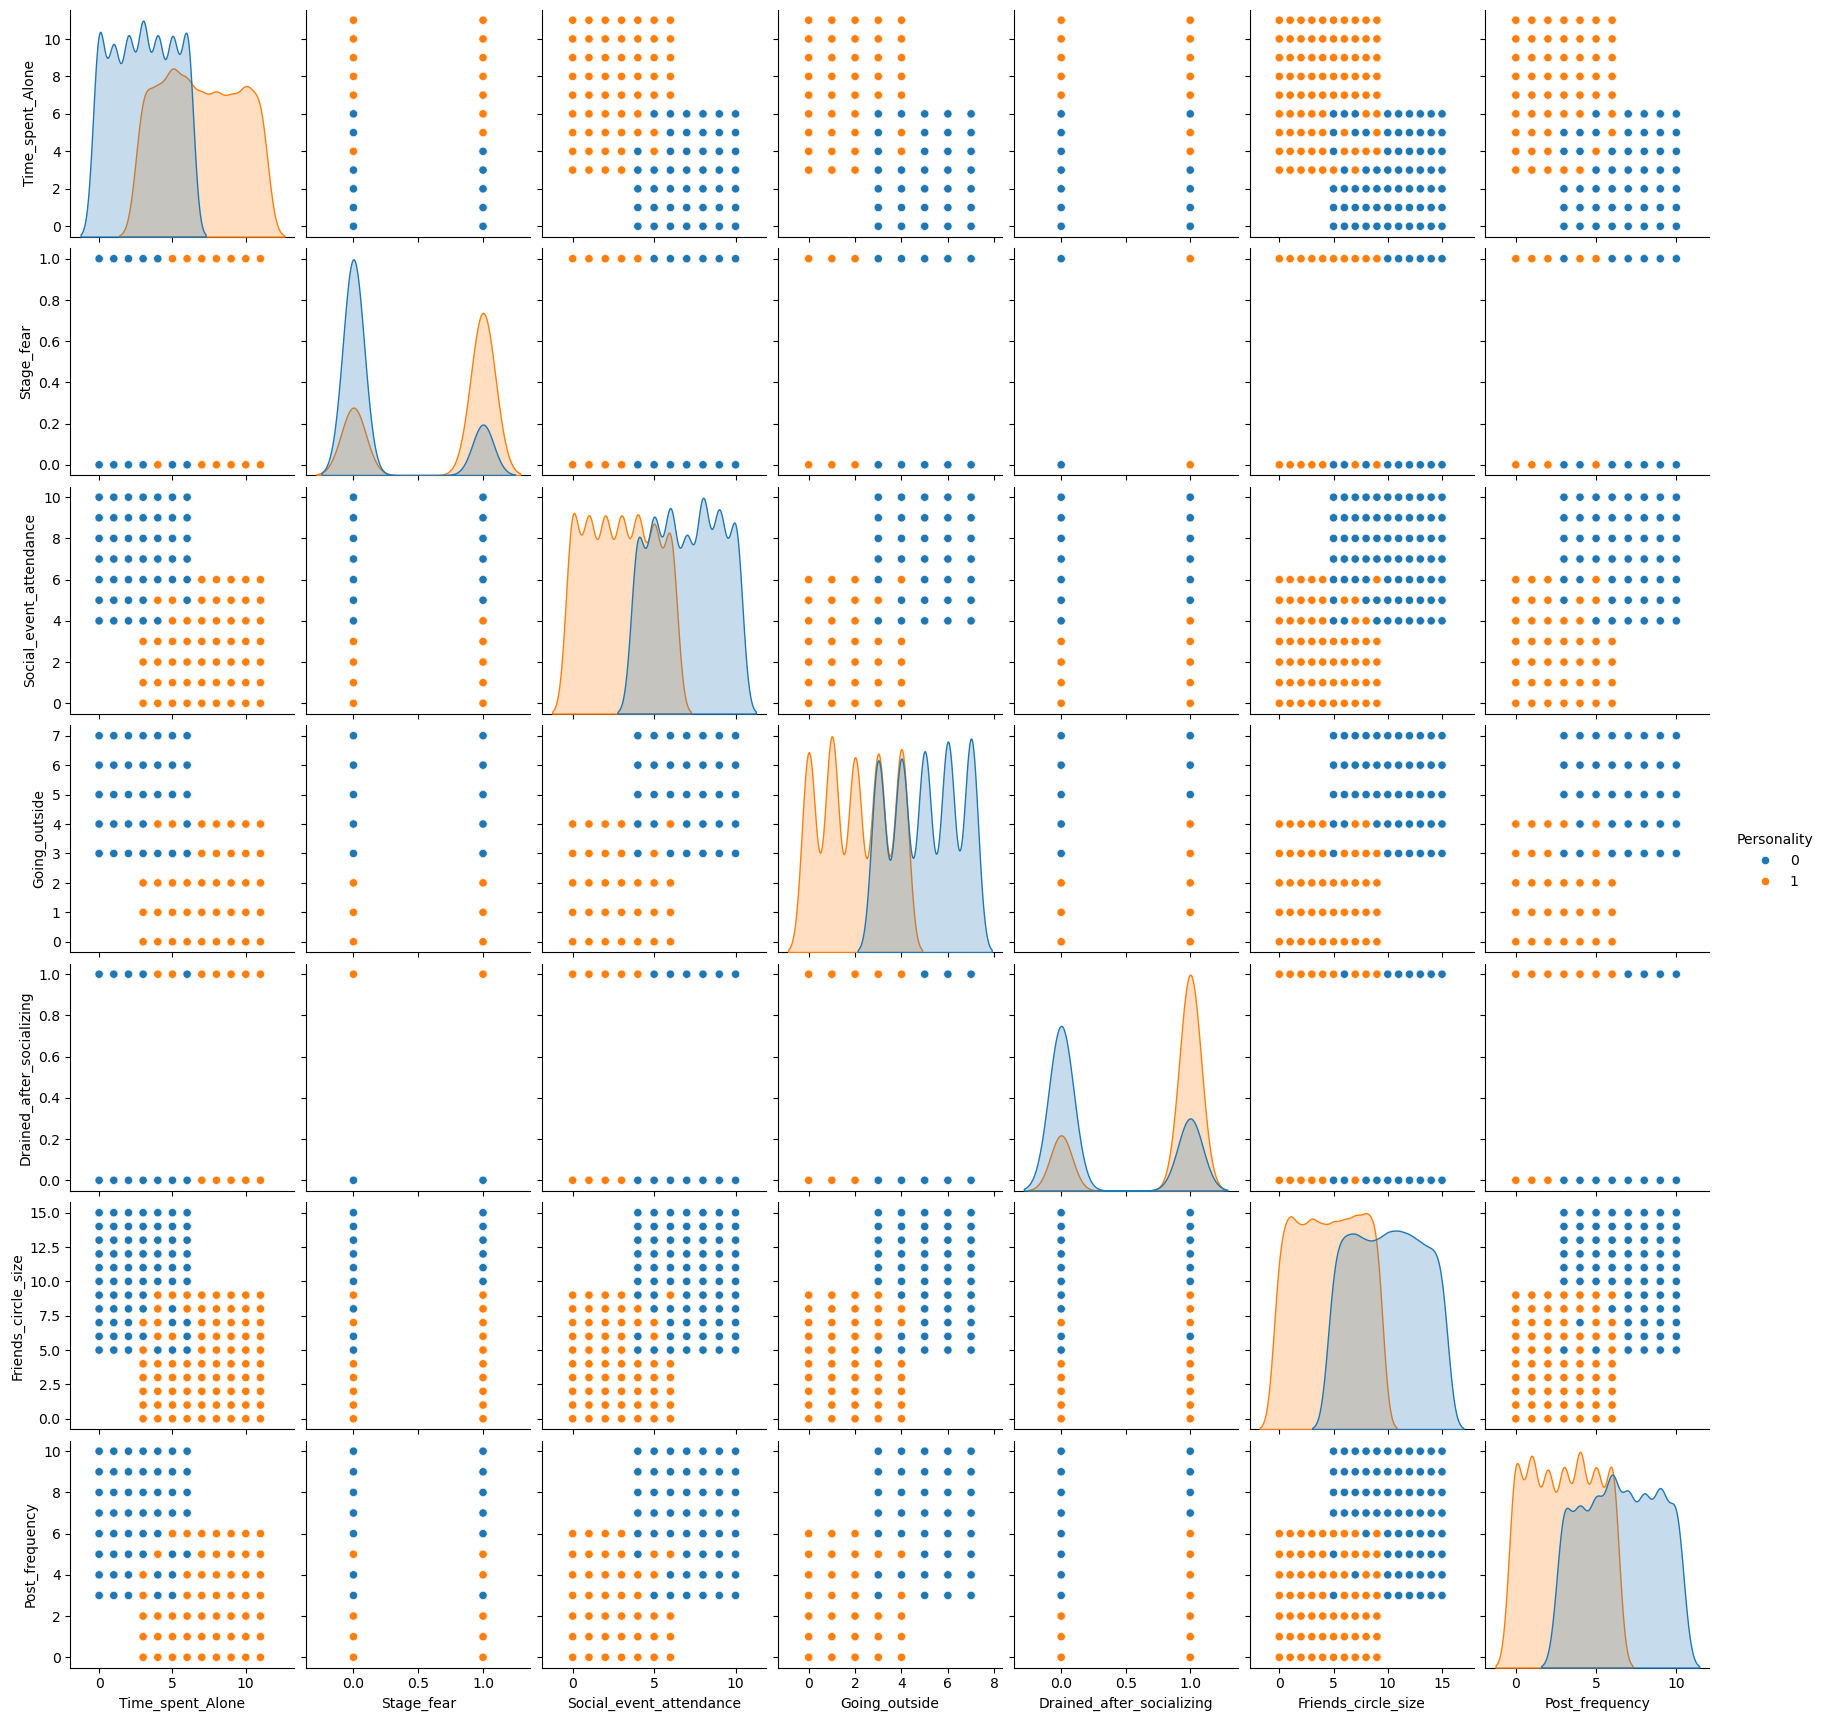

In [7]:
sns.pairplot(df, hue='Personality')
plt.show()


In [8]:
# Example input: you must fill these values based on user/personality
new_data = pd.DataFrame([{
    'Time_spent_Alone': 2,
    'Stage_fear': 1,  # Yes
    'Social_event_attendance': 5,
    'Going_outside': 4,  # your input
    'Drained_after_socializing': 0,  # No
    'Friends_circle_size': 8,
    'Post_frequency': 6
}])

# Predict personality (0 = Extrovert, 1 = Introvert)
predicted = model.predict(new_data)[0]

# Decode back to label
personality_label = 'Introvert' if predicted == 1 else 'Extrovert'
print("Predicted Personality:", personality_label)


Predicted Personality: Extrovert


In [9]:
# Example input: you must fill these values based on user/personality
new_data = pd.DataFrame([{
    'Time_spent_Alone': 4,
    'Stage_fear': 0,  # Yes
    'Social_event_attendance': 5,
    'Going_outside': 2,  # your input
    'Drained_after_socializing': 1,  # No
    'Friends_circle_size': 3,
    'Post_frequency': 2
}])

# Predict personality (0 = Extrovert, 1 = Introvert)
predicted = model.predict(new_data)[0]

# Decode back to label 
personality_label = 'Introvert' if predicted == 1 else 'Extrovert'
print("Predicted Personality:", personality_label)


Predicted Personality: Introvert
